In [ ]:
pip install -q pyNSID sidpy SciFiReaders nanonispy gwyfile pycroscopy wget ipympl

In [ ]:
pip install netCDF4


In [45]:
pip install plotly

     |████████████████████████████████| 16.4 MB 10.9 MB/s eta 0:00:01    |█████████▋                      | 5.0 MB 10.9 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


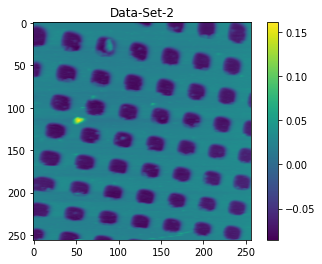

In [36]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# Filename
filename = 'sample.HDF'

# Open the HDF file
hdf_file = Dataset(filename, 'r')

# Assuming you want to read the first variable (adjust as needed)
var_name = list(hdf_file.variables.keys())[0]

# Access the variable
variable = hdf_file.variables[var_name]

# Read the raw data
raw_data = variable[:].data  # Access the underlying data array without masking

# Get the attributes
scale_factor = getattr(variable, 'scale_factor', 1.0)
add_offset = getattr(variable, 'add_offset', 0.0)

# Apply the scale factor and offset
data = raw_data * scale_factor + add_offset

# Display the data using matplotlib
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title(var_name)
plt.savefig('sample.png')
plt.show()

# Close the HDF file
hdf_file.close()


In [48]:
import numpy as np
import plotly.graph_objects as go
from PIL import Image
data= np.array(data)
data[data>0.06] = 0
# Load the image
#img = Image.open('your_image.png').convert('L')  # Convert to grayscale
img_array =data

# Get the dimensions of the image
x = np.arange(0, img_array.shape[1], 1)
y = np.arange(0, img_array.shape[0], 1)
x, y = np.meshgrid(x, y)

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=img_array, x=x, y=y, colorscale='gray')])

# Update layout for better visualization
fig.update_layout(scene=dict(
                    xaxis_title='X-axis',
                    yaxis_title='Y-axis',
                    zaxis_title='Pixel Intensity'),
                  width=500,
                  height=500)

# Show the plot
fig.show()


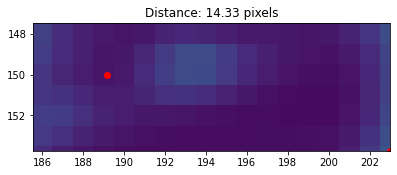

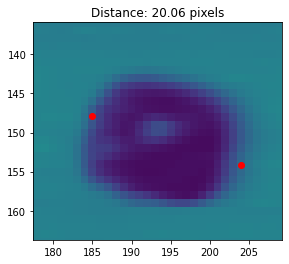

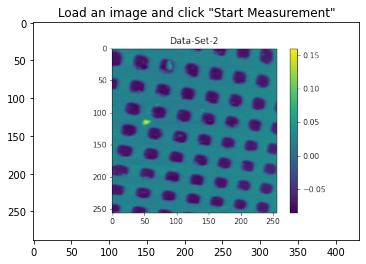

In [42]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from PIL import Image

class LengthMeasurementApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Length Measurement Tool")
        
        self.image_path = None
        self.coords = []
        self.measurement_active = False
        
        self.setup_gui()
        
    def setup_gui(self):
        self.frame = tk.Frame(self.root)
        self.frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        self.load_button = tk.Button(self.frame, text="Load Image", command=self.load_image)
        self.load_button.pack(side=tk.LEFT)
        
        self.start_button = tk.Button(self.frame, text="Start Measurement", command=self.start_measurement)
        self.start_button.pack(side=tk.LEFT)
        
        self.reset_button = tk.Button(self.frame, text="Reset", command=self.reset)
        self.reset_button.pack(side=tk.LEFT)
        
        self.zoom_button = tk.Button(self.frame, text="Zoom", command=self.zoom_mode)
        self.zoom_button.pack(side=tk.LEFT)
        
        self.pan_button = tk.Button(self.frame, text="Pan", command=self.pan_mode)
        self.pan_button.pack(side=tk.LEFT)
        
        self.canvas_frame = tk.Frame(self.root)
        self.canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
    def load_image(self):
        self.image_path = filedialog.askopenfilename()
        if self.image_path:
            self.display_image()
    
    def display_image(self):
        img = Image.open(self.image_path)
        if hasattr(self, 'canvas'):
            self.canvas.get_tk_widget().pack_forget()  # Remove the previous canvas widget
            self.canvas.get_tk_widget().destroy()  # Destroy the previous canvas widget
            self.toolbar.pack_forget()  # Remove the previous toolbar widget
            self.toolbar.destroy()  # Destroy the previous toolbar widget
        
        self.fig, self.ax = plt.subplots()
        self.ax.imshow(img)
        self.ax.set_title('Load an image and click "Start Measurement"')
        
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.canvas_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        self.toolbar = NavigationToolbar2Tk(self.canvas, self.canvas_frame)
        self.toolbar.update()
        self.toolbar.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.on_click)
    
    def start_measurement(self):
        self.coords = []
        self.measurement_active = True
        self.ax.set_title('Click on two points to measure distance')
        self.canvas.draw()
        
    def on_click(self, event):
        if self.measurement_active and event.inaxes:
            self.coords.append((event.xdata, event.ydata))
            self.ax.plot(event.xdata, event.ydata, 'ro')
            if len(self.coords) == 2:
                self.calculate_distance()
                self.measurement_active = False  # Disable measurement after two points are clicked
            self.canvas.draw()
            
    def calculate_distance(self):
        p1, p2 = self.coords
        distance = np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
        self.ax.set_title(f"Distance: {distance:.2f} pixels")
        self.canvas.draw()
        
    def reset(self):
        self.coords.clear()
        self.measurement_active = False
        if hasattr(self, 'canvas'):
            self.canvas.get_tk_widget().pack_forget()  # Remove the current canvas widget
            self.canvas.get_tk_widget().destroy()  # Destroy the current canvas widget
            self.toolbar.pack_forget()  # Remove the current toolbar widget
            self.toolbar.destroy()  # Destroy the current toolbar widget
        self.display_image()
        
    def zoom_mode(self):
        self.toolbar.zoom()
        
    def pan_mode(self):
        self.toolbar.pan()
        
if __name__ == "__main__":
    root = tk.Tk()
    app = LengthMeasurementApp(root)
    root.mainloop()
